An algorithm to generate isochrones i.e. the area accessible in public transportation from a given point (latitude + longitude) and date during a given time. 
Data generated thanks to Navitia API http://doc.navitia.io/#isochrones-currently-in-beta

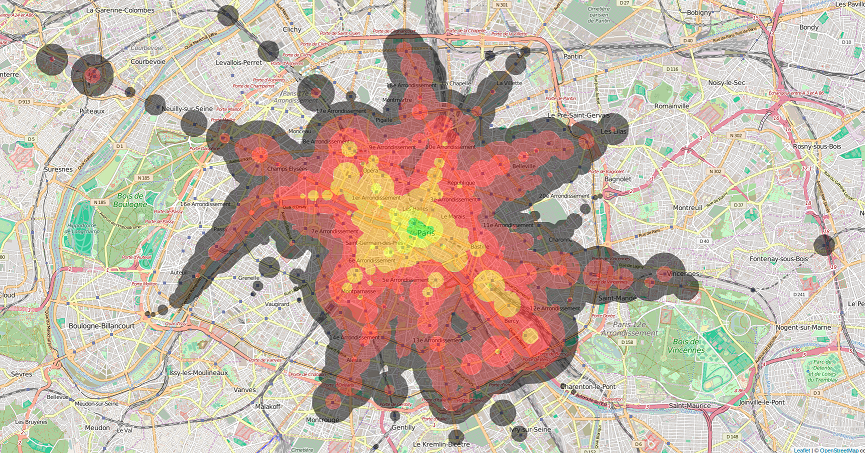

### Importing libraries

In [4]:
import requests
import pandas as pd
import os
import json


### Path and API access

First, you have to create an account in https://navitia.io/ to generate a token

In [ ]:
df = pd.read_csv('path_to_data',sep=',',encoding='1252')

outputpath = 'folder containing JSON outputs'

boundary_duration =[3000] #Set the different periods en seconds 

token= '' #the token to be used to access the API (account creation mandatory)

head = {'Authorization': token} 

Specify the date you wish so the isochrone takes it into account

In [ ]:
date = input("Enter a date (YYYYMMDD):")
print("Date is: " + date)
mydate= date+'T000000'
print(mydate)

Run the cell !

In [ ]:
for longitude, latitude,result_city in (zip(df.longitude,df.latitude,df.result_city)):
    print(longitude, latitude,result_city)
    url = 'https://api.navitia.io/v1/coverage/fr-idf/isochrones?from='+str(longitude)+';'+str(latitude)+'&boundary_duration[]='+str(boundary_duration[0])#+'&boundary_duration[]='+str(boundary_duration[1])#+'&boundary_duration[]='+str(boundary_duration[2])+'&boundary_duration[]='+str(boundary_duration[3])
    response = requests.get(url,headers=head)
    response = response.json()
    if len(response)>1:
        response = response['isochrones']
        for bound in range(len(boundary_duration)):
            print(bound)
            mygeojson = response[bound]['geojson']
            with open(os.path.join(outputpath, 'iso_Navitia_'+str(boundary_duration[bound])+'_'+result_city+'.json'), 'w')  as f:
                f.write(json.dumps(mygeojson))

Isochrones have been generated in JSON format ! 